In [1]:
import os
import sys
import numpy as np
import PIL.Image

import torch
import torchvision

sys.path. append('../icnn_torch')
from icnn import reconstruct_stim
from utils import normalise_img, img_preprocess,img_deprocess, get_cnn_features


In [2]:
#load CNN model from torchvision
#net = torchvision.models.resnet50(pretrained=True)
#net = torchvision.models.vgg19(pretrained=True)
net = torchvision.models.alexnet(pretrained=True)

#set the evaluation model
net.eval()

#set the preprocessing methods 
img_mean=np.array([0.485, 0.456, 0.406]).astype(np.float32)
img_std=np.array([0.229, 0.224, 0.225]).astype(np.float32)
norm  = 255 # image is converted from 0-255 into 0-1
#pytorch model is generally RGB input, not BGR
bgr = False

In [3]:
#save_dir
save_dir = './result'
save_folder = 'icnn_shortest_demo'
save_path = os.path.join(save_dir,save_folder)
os.makedirs(save_path, exist_ok=True)

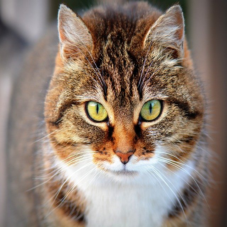

In [7]:
#load image and reshape into 227, 227 (for alexnet)
org_img = PIL.Image.open('cat_sample_img.jpg').resize((227,227), resample=2)
org_img


In [8]:
#convert to np.array
org_img = np.array(org_img)

In [9]:
#preprocessing image for pytorch model
prep_img = img_preprocess(np.asarray(org_img), img_mean, img_std, norm)
#prep_img.shape => (3, 227, 227)

In [10]:
#Convert tensor
inputs = torch.tensor(prep_img[np.newaxis])

In [11]:
#show model for selecting layer
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
#selct target layers as a list
target_layer_list = ['features[0]', 'features[3]', 'features[6]', 'features[8]','features[10]',
                                       'classifier[1]', 'classifier[4]', 'classifier[6]']

target_layer_list =target_layer_list = [ 'features[3]']

In [13]:
#obtain feature for the input
features = get_cnn_features(net, inputs, target_layer_list)

In [17]:
target_layer_dict = dict(zip(target_layer_list, features))

In [18]:
opts = {
    # Loss function type: {'l2', 'CorrLoss', 'FeatCorrLoss'}
    'loss_type': 'l2',
    
    'img_mean': img_mean,
    'img_std' : img_std,
    'norm': norm,
    'bgr': bgr,

    # The initial image for the optimization (setting to None will use random
    # noise as initial image)
    'initial_input': None,

    # A python dictionary consists of channels to be selected, arranged in
    # pairs of layer name (key) and channel numbers (value); the channel
    # numbers of each layer are the channels to be used in the loss function;
    # use all the channels if some layer not in the dictionary; setting to None
    # for using all channels for all layers;
    'channel': None,
    
    'iter_n': 500,
    
    'input_size': (227,227,3),
    
    'opt_name' : 'Adam',
   
}

In [19]:
# perform reconstruction
recon_img, loss_list = reconstruct_stim(target_layer_dict, net, **opts)

iter=1; err=4.20711e+07;
iter=2; err=3.71277e+07;
iter=3; err=3.27483e+07;
iter=4; err=2.88812e+07;
iter=5; err=2.54805e+07;
iter=6; err=2.24948e+07;
iter=7; err=1.98824e+07;
iter=8; err=1.76019e+07;
iter=9; err=1.56192e+07;
iter=10; err=1.38984e+07;
iter=11; err=1.24029e+07;
iter=12; err=1.11048e+07;
iter=13; err=9.97994e+06;
iter=14; err=9.00407e+06;
iter=15; err=8.15301e+06;
iter=16; err=7.4113e+06;
iter=17; err=6.7613e+06;
iter=18; err=6.19576e+06;
iter=19; err=5.69712e+06;
iter=20; err=5.25926e+06;
iter=21; err=4.86925e+06;
iter=22; err=4.52413e+06;
iter=23; err=4.21939e+06;
iter=24; err=3.94753e+06;
iter=25; err=3.70396e+06;
iter=26; err=3.48537e+06;
iter=27; err=3.28879e+06;
iter=28; err=3.11065e+06;
iter=29; err=2.94921e+06;
iter=30; err=2.80254e+06;
iter=31; err=2.66777e+06;
iter=32; err=2.54576e+06;
iter=33; err=2.43208e+06;
iter=34; err=2.3284e+06;
iter=35; err=2.23076e+06;
iter=36; err=2.13996e+06;
iter=37; err=2.05578e+06;
iter=38; err=1.97906e+06;
iter=39; err=1.90578e+06

iter=365; err=330275;
iter=366; err=330059;
iter=367; err=329720;
iter=368; err=329605;
iter=369; err=329275;
iter=370; err=329141;
iter=371; err=328745;
iter=372; err=328734;
iter=373; err=328384;
iter=374; err=328146;
iter=375; err=327906;
iter=376; err=327739;
iter=377; err=327488;
iter=378; err=327341;
iter=379; err=327047;
iter=380; err=326893;
iter=381; err=326645;
iter=382; err=326515;
iter=383; err=326245;
iter=384; err=326089;
iter=385; err=325846;
iter=386; err=325695;
iter=387; err=325495;
iter=388; err=325281;
iter=389; err=325030;
iter=390; err=324909;
iter=391; err=324612;
iter=392; err=324446;
iter=393; err=324248;
iter=394; err=324105;
iter=395; err=323817;
iter=396; err=323677;
iter=397; err=323433;
iter=398; err=323348;
iter=399; err=323018;
iter=400; err=322868;
iter=401; err=322685;
iter=402; err=322501;
iter=403; err=322326;
iter=404; err=322137;
iter=405; err=321943;
iter=406; err=321814;
iter=407; err=321596;
iter=408; err=321449;
iter=409; err=321263;
iter=410; 

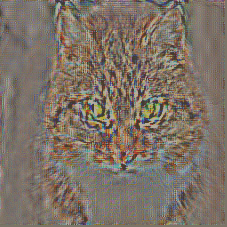

In [23]:
PIL.Image.fromarray(np.uint8(recon_img))

In [31]:
#We can select multiple layers 
target_layer_list = ['features[0]', 'features[3]', 'features[6]']

In [32]:
#obtain feature for the input
features = get_cnn_features(net, inputs, target_layer_list)
target_layer_dict = dict(zip(target_layer_list, features))

#optional: layer weight
feat_norm_list = np.array([np.linalg.norm(features[i].detach().numpy().astype(np.float)) for i in range(len(features))], dtype= np.float32)
# Use the inverse of the squared norm of the CNN features as the weight for each layer
weights = 1. / (feat_norm_list**2)
# Normalise the weights such that the sum of the weights = 1
weights = weights / weights.sum()

#layer_weight = dict(zip(layer_list, weights))
layer_weight= dict(zip(target_layer_list, weights))


In [33]:
opts = {
    # Loss function type: {'l2', 'l1', 'inner', 'gram'}
    'loss_type': 'l2',
    
    'img_mean': img_mean,
    'img_std' : img_std,
    'norm': norm,
    'bgr': bgr,
    
    # A python dictionary consists of weight parameter of each layer in the
    # loss function, arranged in pairs of layer name (key) and weight (value);
   'layer_weight': layer_weight,

    # The initial image for the optimization (setting to None will use random
    # noise as initial image)
    'initial_input': None,

    # A python dictionary consists of channels to be selected, arranged in
    # pairs of layer name (key) and channel numbers (value); the channel
    # numbers of each layer are the channels to be used in the loss function;
    # use all the channels if some layer not in the dictionary; setting to None
    # for using all channels for all layers;
    'channel': None,
    
    'iter_n': 500,
    
    'input_size': (227,227,3),
    
    'opt_name' : 'Adam',
   
}

In [34]:
# perform reconstruction
recon_img, loss_list = reconstruct_stim(target_layer_dict, net, **opts)

iter=1; err=4.45264e+06;
iter=2; err=4.14581e+06;
iter=3; err=3.86525e+06;
iter=4; err=3.60901e+06;
iter=5; err=3.37513e+06;
iter=6; err=3.16207e+06;
iter=7; err=2.96797e+06;
iter=8; err=2.79146e+06;
iter=9; err=2.63082e+06;
iter=10; err=2.48474e+06;
iter=11; err=2.35113e+06;
iter=12; err=2.22908e+06;
iter=13; err=2.11704e+06;
iter=14; err=2.01366e+06;
iter=15; err=1.91834e+06;
iter=16; err=1.83071e+06;
iter=17; err=1.749e+06;
iter=18; err=1.67284e+06;
iter=19; err=1.60106e+06;
iter=20; err=1.53367e+06;
iter=21; err=1.47e+06;
iter=22; err=1.40952e+06;
iter=23; err=1.35188e+06;
iter=24; err=1.29734e+06;
iter=25; err=1.24536e+06;
iter=26; err=1.19585e+06;
iter=27; err=1.1483e+06;
iter=28; err=1.10305e+06;
iter=29; err=1.05979e+06;
iter=30; err=1.01803e+06;
iter=31; err=978571;
iter=32; err=940917;
iter=33; err=905337;
iter=34; err=871588;
iter=35; err=839349;
iter=36; err=808773;
iter=37; err=780245;
iter=38; err=752831;
iter=39; err=727208;
iter=40; err=702653;
iter=41; err=679647;
iter

iter=372; err=120341;
iter=373; err=120387;
iter=374; err=120240;
iter=375; err=120253;
iter=376; err=120149;
iter=377; err=120163;
iter=378; err=120046;
iter=379; err=120095;
iter=380; err=119963;
iter=381; err=119983;
iter=382; err=119865;
iter=383; err=119907;
iter=384; err=119761;
iter=385; err=119842;
iter=386; err=119692;
iter=387; err=119692;
iter=388; err=119640;
iter=389; err=119611;
iter=390; err=119526;
iter=391; err=119521;
iter=392; err=119458;
iter=393; err=119472;
iter=394; err=119395;
iter=395; err=119390;
iter=396; err=119338;
iter=397; err=119328;
iter=398; err=119250;
iter=399; err=119214;
iter=400; err=119189;
iter=401; err=119172;
iter=402; err=119110;
iter=403; err=119100;
iter=404; err=119015;
iter=405; err=119030;
iter=406; err=118936;
iter=407; err=118972;
iter=408; err=118892;
iter=409; err=118896;
iter=410; err=118806;
iter=411; err=118830;
iter=412; err=118755;
iter=413; err=118743;
iter=414; err=118676;
iter=415; err=118692;
iter=416; err=118637;
iter=417; 

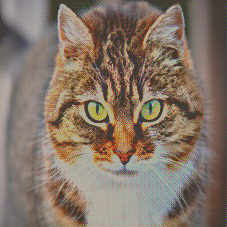

In [35]:
PIL.Image.fromarray(np.uint8(recon_img))